In [9]:
from __future__ import print_function

import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image

from pandas import DataFrame, Series
import numpy as np
import pandas as pd
import glob
import os
%matplotlib inline

So to start, we need to prep the metagenomes to be ready for recruitment.  They are all paired, trimmed metagenomes that are of similar size.

First things first, joining them:

flash -m 35 -M 125 -x 0.05 -t 20 -z --output-prefix=CV88 CV88_R1.trimmo.paired.fastq.gz CV88_R2.trimmo.paired.fastq.gz 2>&1 | tee flash.log

-m: minimum overlap
-M: max overlap
-x: max mismatch density
-t: threads
-z: compress
--to-stdout


In [3]:
from __future__ import print_function

min_ol = 35
max_ol = 125
mmd = 0.05
threads = 20
fq1 = "f1.fastq"
of = "outfile"
fq2 = None

if fq2 is not None:
    cmd = ("flash -m {min_ol} -M {max_ol} -x {mmd} -t {threads}"
           "--to-stdout {fq1} {fq2} | gzip > {of}".format(**locals()))
    print(cmd)
else:
    cmd = ("flash -m {min_ol} -M {max_ol} -x {mmd} -t {threads}"
           "--to-stdout {fq1} | gzip > {of}".format(**locals()))
    print(cmd)

flash -m 35 -M 125 -x 0.05 -t 20--to-stdout f1.fastq | gzip > outfile


Function written into script mg_

*test:

load 
```
pref = "/mnt/stepanauskas_nfs/mpachiadaki/From_Ramunas/Vents_Sievert_150902/Metagenomes/QC_reads/"
fwd = pref + "LVP-8_trimmed_R1.fastq.gz"
rev = pref + "LVP-8_trimmed_R2.fastq.gz"
prefix = "lvp8"
run_flash(prefix, fwd, rev, cores=20) 
```

In [8]:
pwd

u'/Users/julia/Desktop/stepanauskas/maria/recruitment'

In [4]:



inhist = "./data/lvp8.hist"

hist1 = pd.read_table(inhist, header=None)
hist1.columns = ["length", "read_count"]


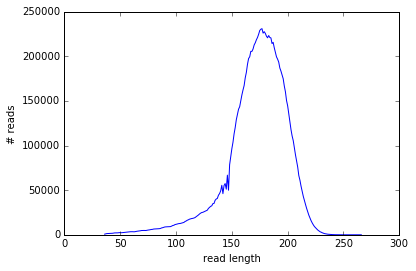

In [5]:
hist1

fig2 = plt.plot(hist1['length'], hist1['read_count'], color='b')
plt.ylabel('# reads')
plt.xlabel('read length')
plt.savefig("./data/testsave")

In [6]:
joined_pairs = hist1.read_count.sum()
total_bp = (hist1.length*hist1.read_count).sum()
mean_len = total_bp/joined_pairs

In [7]:
print("metagenome", os.path.basename(inhist).strip(".hist"), sep="\t")
print("joined_pairs", joined_pairs, sep="\t")
print("total_bp", total_bp, sep="\t")
print("mean_length", mean_len, sep="\t")

metagenome	lvp8
joined_pairs	12861014
total_bp	2216031944
mean_length	172


In [7]:
def join_stats(inhist, prefix = ""):
    '''
    Print join stats and png of read size distribution
    Args:
        inhist (str): path to .hist output from standard flash output
        prefix (str): location to write output to, defaults to current directory 
    Output:
        joined read size distribution plot as png
        joined read stats as a tab-separated text file
    '''
    name = os.path.basename(inhist).strip(".hist")
    outname = "{prefix}{name}_joinstats.txt".format(**locals())
    png_name = "{prefix}{name}_joinstats.png".format(**locals())
    hist1 = pd.read_table(inhist, header=None)
    hist1.columns = ["length", "read_count"]
    fig2 = plt.plot(hist1['length'], hist1['read_count'], color='b')
    plt.ylabel('# reads')
    plt.xlabel('read length')
    plt.savefig(png_name)
    joined_pairs = hist1.read_count.sum()
    total_bp = (hist1.length*hist1.read_count).sum()
    mean_len = total_bp/joined_pairs
    with open(outname, "w") as oh:
        print("metagenome", name, sep="\t", file=oh)
        print("joined_pairs", joined_pairs, sep="\t", file=oh)
        print("total_bp", total_bp, sep="\t", file=oh)
        print("mean_length", mean_len, sep="\t", file=oh)

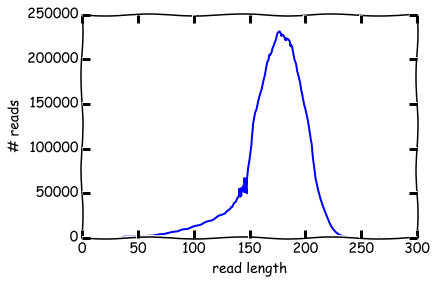

In [10]:
join_stats("./data/lvp8.hist", "./data/")

In [11]:
!open ./data/lvp8_joinstats.txt -a textedit
!open ./data/lvp8_joinstats.png -a preview

In [2]:
%load_ext rpy2.ipython
%R library(ggplot2); library(dplyr)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


array(['dplyr', 'ggplot2', 'tools', 'stats', 'graphics', 'grDevices',
       'utils', 'datasets', 'methods', 'base'], 
      dtype='|S9')

In [36]:
outpath = "./data/"

In [64]:
%%R -i inhist -i outpath
#a better join plot
tbl = read.table(inhist, sep="\t", header=FALSE)
df = tbl_df(tbl)
name = inhist %>% basename %>% gsub(".hist", "", .)

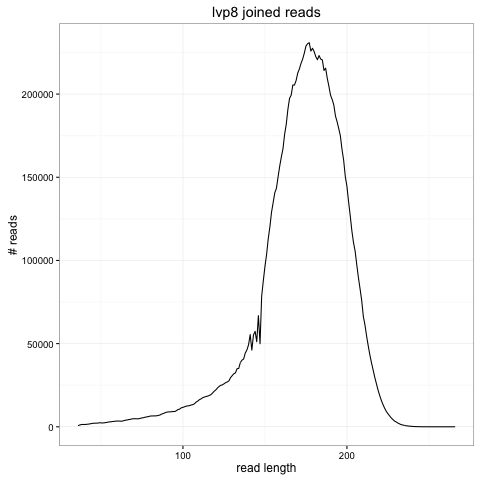

In [41]:
%%R
p1 <- df %>% ggplot(aes(V1, V2)) + geom_line() + theme_bw() + labs(y="# reads", x="read length", title=paste(name, "joined reads", sep=" "))
plot(p1)

In [38]:
%%R
png(filename = paste(outpath, name, "_joined_readsize.png", sep=""),
         width = 480, height = 480, units = "px", pointsize = 12)
plot(p1)
dev.off()

quartz_off_screen 
                2 


In [66]:
%%R
df <- df %>% mutate(bp = V1*V2)
df

Source: local data frame [231 x 3]

      V1    V2    bp
   (int) (int) (int)
1     36   700 25200
2     37  1062 39294
3     38  1358 51604
4     39  1428 55692
5     40  1378 55120
6     41  1465 60065
7     42  1587 66654
8     43  1705 73315
9     44  1908 83952
10    45  2124 95580
..   ...   ...   ...


In [79]:
%%R
sms = colSums(df)
str(sms)

 Named num [1:3] 3.49e+04 1.29e+07 2.22e+09
 - attr(*, "names")= chr [1:3] "V1" "V2" "bp"


In [157]:
%%R
mean_length = round(sms[["bp"]]/sms[['V2']])
total_reads = sms[['V2']]
total_bp = sms[['bp']]

c1 = c("mg_name", "mean_length", "total_reads", "total_bp")
c3 = c(name, mean_length, total_reads, total_bp)

tbl2 = cbind(c1, c3)
print(tbl2)

     c1            c3          
[1,] "mg_name"     "lvp8"      
[2,] "mean_length" "172"       
[3,] "total_reads" "12861014"  
[4,] "total_bp"    "2216031944"


In [106]:
%%R
oh <- paste(outpath, name, "_joined_read_numbers.txt", sep="")
            
write.table(tbl2, oh, quote=FALSE, col.names=FALSE, sep="\t", row.names=FALSE)

### For read recruitment, a bbmap test:

First run, using joined reads from mg lvp8 to recruit to SAG AAA036-G05

First run default minimum match id is 76%.

In [120]:
prefix = "/mnt/stepanauskas_nfs/julia/fragdev/"
                                            
reads = "/mnt/stepanauskas_nfs/julia/fragdev/lvp8.extendedFrags.fastq.gz"
reference = "/mnt/stepanauskas_nfs/julia/Test_FragRecruitment/Masked_genomes/AAA036-G05-Sulfurovum.fasta"

bprefix = os.path.join(prefix, os.path.join(prefix, "{readbase}_bbmaped2_{refbase}".format(readbase = os.path.basename(reads).split(".")[0], 
                                             refbase = os.path.basename(reference).strip(".fasta"))))

out = bprefix+".sam.gz"
out_cov = bprefix+"_covstats.txt"
covhist=bprefix+"_covhist.txt"
basecov=bprefix+"_basecov.txt"


cmd = "time bash ~/programs/bbmap/bbmap.sh in={reads} out={out} covstats={out_cov} \
covhist={covhist} basecov={basecov} ref={reference} threads=20 -Xmx20g &> bbmaptest.log".format(**locals())
print(cmd)

time bash ~/programs/bbmap/bbmap.sh in=/mnt/stepanauskas_nfs/julia/fragdev/lvp8.extendedFrags.fastq.gz out=/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum.sam.gz covstats=/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_covstats.txt covhist=/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_covhist.txt basecov=/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_basecov.txt ref=/mnt/stepanauskas_nfs/julia/Test_FragRecruitment/Masked_genomes/AAA036-G05-Sulfurovum.fasta threads=20 -Xmx20g &> bbmaptest.log


In [127]:
%%R

covstats <- read.table("./data/lvp8_bbmaped2_AAA036-G05-Sulfurovum_covstats.txt", sep="\t", header=FALSE)
colnames(covstats) <- c("ID", "Avg_fold", "Length", "Ref_GC", "Covered_percent", "Covered_bases", "Plus_reads", "Minus_reads", "Median_fold", "Read_GC", "Std_Dev")
head(covstats)

                                              ID Avg_fold Length Ref_GC
1 AAA036-G05-Sulfurovum_contig00001_length134285   8.4308 134285 0.3525
2  AAA036-G05-Sulfurovum_contig00002_length84142   4.2270  84142 0.3476
3  AAA036-G05-Sulfurovum_contig00003_length58385   5.9502  58385 0.3524
4  AAA036-G05-Sulfurovum_contig00004_length51935  13.6107  51935 0.3646
5  AAA036-G05-Sulfurovum_contig00005_length48298   2.9817  48298 0.3777
6  AAA036-G05-Sulfurovum_contig00006_length43765   2.5674  43765 0.3232
  Covered_percent Covered_bases Plus_reads Minus_reads Median_fold Read_GC
1         53.5406         71897       3221        3307           1  0.3838
2         38.6442         32516        966        1083           0  0.3905
3         45.7309         26700        967        1064           0  0.3804
4         73.0047         37915       1806        2134           5  0.3882
5         39.2459         18955        436         410           0  0.3997
6         26.0871         11417        351    

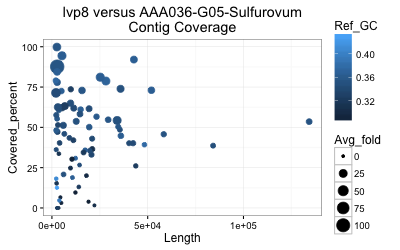

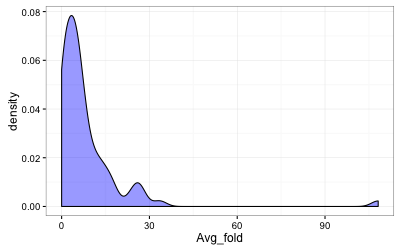

In [145]:
%%R -h 250 -w 400
head(covstats)

covstats %>% ggplot(aes(Length, Covered_percent, col=Ref_GC, size=Avg_fold)) + geom_point() + theme_bw() -> p1

covstats %>% ggplot(aes(Avg_fold)) + geom_density(fill="blue", alpha=0.4) + theme_bw() -> p2
plot(p1 + labs(title = "lvp8 versus AAA036-G05-Sulfurovum\nContig Coverage"))
plot(p2)

In [154]:
%%R
total_bp <- sum(covstats$Length)
covered_bp <- sum(covstats$Covered_bases)

totalpct <- round(covered_bp/total_bp * 100)
print(paste("The percent of this SAG covered by reads from the metagenome is: ", totalpct, "%", sep=""))

[1] "The percent of this SAG covered by reads from the metagenome is: 48%"


In [161]:
%%R
total_reads_recruited <- sum(covstats$Plus_reads) + sum(covstats$Minus_reads)
proportion <- round(total_reads_recruited/total_reads * 100, digits=2)
print(paste("There were ", total_reads, " reads that recruited to this SAG", " which is ", proportion, "% of the total metagenome", sep=""))

[1] "There were 12861014 reads that recruited to this SAG which is 0.47% of the total metagenome"


### Next going to run in "perfect" mode to see the difference

In [165]:
prefix = "/mnt/stepanauskas_nfs/julia/fragdev/"
                                            
reads = "/mnt/stepanauskas_nfs/julia/fragdev/lvp8.extendedFrags.fastq.gz"
reference = "/mnt/stepanauskas_nfs/julia/Test_FragRecruitment/Masked_genomes/AAA036-G05-Sulfurovum.fasta"

bprefix = os.path.join(prefix, os.path.join(prefix, "{readbase}_bbmaped2_{refbase}".format(readbase = os.path.basename(reads).split(".")[0], 
                                             refbase = os.path.basename(reference).strip(".fasta"))))


out_cov = bprefix+"_perf_covstats.txt"
bin_cov = bprefix+"_perf_bincov.txt"


cmd = "time bash ~/programs/bbmap/bbmap.sh in={reads} bincov={bin_cov} covstats={out_cov} perfectmode=t ref={reference} threads=20 -Xmx20g &> bbmap2_perf.log".format(**locals())
print(cmd)

time bash ~/programs/bbmap/bbmap.sh in=/mnt/stepanauskas_nfs/julia/fragdev/lvp8.extendedFrags.fastq.gz bincov=/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_perf_bincov.txt covstats=/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_perf_covstats.txt perfectmode=t ref=/mnt/stepanauskas_nfs/julia/Test_FragRecruitment/Masked_genomes/AAA036-G05-Sulfurovum.fasta threads=20 -Xmx20g &> bbmap2_perf.log


In [166]:
!scp charlie.bigelow.org:/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_perf_covstats.txt ./data/

lvp8_bbmaped2_AAA036-G05-Sulfurovum_perf_covs 100% 7301     7.1KB/s   00:00    


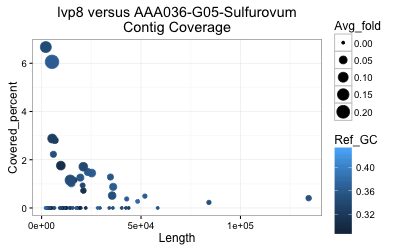

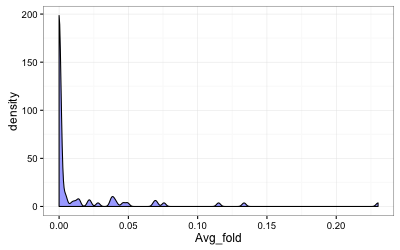

In [3]:
%%R -h 250 -w 400
covstats2 <- read.table("./data/lvp8_bbmaped2_AAA036-G05-Sulfurovum_perf_covstats.txt", sep="\t", header=FALSE)
colnames(covstats2) <- c("ID", "Avg_fold", "Length", "Ref_GC", "Covered_percent", "Covered_bases", "Plus_reads", "Minus_reads", "Median_fold", "Read_GC", "Std_Dev")

covstats2 %>% ggplot(aes(Length, Covered_percent, col=Ref_GC, size=Avg_fold)) + geom_point() + theme_bw() -> p1

covstats2 %>% ggplot(aes(Avg_fold)) + geom_density(fill="blue", alpha=0.4) + theme_bw() -> p2
plot(p1 + labs(title = "lvp8 versus AAA036-G05-Sulfurovum\nContig Coverage"))
plot(p2)

In [7]:
%%R
total_bp <- sum(covstats2$Length)
covered_bp <- sum(covstats2$Covered_bases)
print(total_bp)
print(covered_bp)

totalpct <- round(covered_bp/total_bp * 100)
print(paste("The percent of this SAG covered by reads from the metagenome is: ", totalpct, "%", sep=""))

[1] 1350781
[1] 5503
[1] "The percent of this SAG covered by reads from the metagenome is: 0%"


So using perfect matches only reduces the number of reads recruited to the SAG to a point where there is hardly any coverage of the SAG at all.

### Next, going to explore a set of alignment thresholds to figure out what could be the best for our problem.

From Swan et al 2013, they used:

*"≥200 bp long and ≥95% identity, normalized by the length of each SAG assembly."*

Obviously this isn't possible for our reads since the mean length is less than 200bp.  

95% identity is a good place to start to examine how well this program performs.

bbmap's default minimum identity is 0.76 which is obviously much lower than 0.95.  Next run will test recruitment at 0.95%.

In [24]:
prefix = "/mnt/stepanauskas_nfs/julia/fragdev/"
                                            
reads = "/mnt/stepanauskas_nfs/julia/fragdev/lvp8.extendedFrags.fastq.gz"
reference = "/mnt/stepanauskas_nfs/julia/Test_FragRecruitment/Masked_genomes/AAA036-G05-Sulfurovum.fasta"

bprefix = os.path.join(prefix, os.path.join(prefix, "{readbase}_bbmaped2_{refbase}".format(readbase = os.path.basename(reads).split(".")[0], 
                                             refbase = os.path.basename(reference).strip(".fasta"))))
aln_id = 0.95

out_cov = bprefix+"_95_covstats.txt"


cmd = "time bbmap.sh in={reads} minid={aln_id} covstats={out_cov} ref={reference} threads=20 -Xmx20g &> bbmap_95.log".format(**locals())
print(cmd)

time bbmap.sh in=/mnt/stepanauskas_nfs/julia/fragdev/lvp8.extendedFrags.fastq.gz minid=0.95 covstats=/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_95_covstats.txt ref=/mnt/stepanauskas_nfs/julia/Test_FragRecruitment/Masked_genomes/AAA036-G05-Sulfurovum.fasta threads=20 -Xmx20g &> bbmap_95.log


In [15]:
!scp charlie.bigelow.org:/mnt/stepanauskas_nfs/julia/fragdev/lvp8_bbmaped2_AAA036-G05-Sulfurovum_95_covstats.txt ./data/

lvp8_bbmaped2_AAA036-G05-Sulfurovum_95_covsta 100% 6787     6.6KB/s   00:00    


In [20]:
!open ./data/lvp8_bbmaped2_AAA036-G05-Sulfurovum_95_covstats.txt

[1] 1350781
[1] 41352
[1] "The percent of this SAG covered by reads from the metagenome is: 3%"


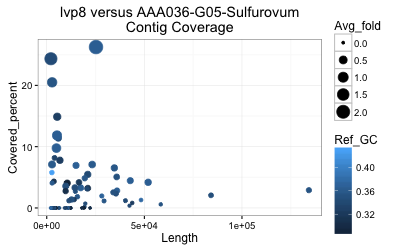

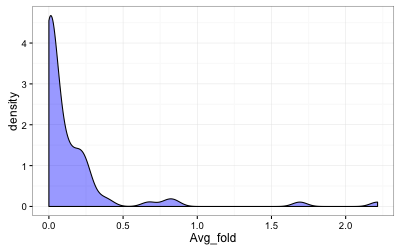

In [22]:
%%R -h 250 -w 400
covstats2 <- read.table("./data/lvp8_bbmaped2_AAA036-G05-Sulfurovum_95_covstats.txt", header=FALSE)
colnames(covstats2) <- c("ID", "Avg_fold", "Length", "Ref_GC", "Covered_percent", "Covered_bases", "Plus_reads", "Minus_reads", "Read_GC")

covstats2 %>% ggplot(aes(Length, Covered_percent, col=Ref_GC, size=Avg_fold)) + geom_point() + theme_bw() -> p1

covstats2 %>% ggplot(aes(Avg_fold)) + geom_density(fill="blue", alpha=0.4) + theme_bw() -> p2
plot(p1 + labs(title = "lvp8 versus AAA036-G05-Sulfurovum\nContig Coverage"))
plot(p2)

total_bp <- sum(covstats2$Length)
covered_bp <- sum(covstats2$Covered_bases)
print(total_bp)
print(covered_bp)

totalpct <- round(covered_bp/total_bp * 100)
print(paste("The percent of this SAG covered by reads from the metagenome is: ", totalpct, "%", sep=""))